In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [23]:
from tensorflow.keras.layers import Bidirectional

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train=np.load("./drive/My Drive/audio_train.npy")
test=np.load("./drive/My Drive/audio_test.npy")

In [4]:
train_labels=pd.read_csv("./drive/My Drive/labels_train.csv")
sample_submission=pd.read_csv("./drive/My Drive/sample_submission.csv")

In [5]:
train_labels

,id,label
0,0,5
1,1,1
2,2,1
3,3,0
4,4,9
...,...,...
937,937,9
938,938,1
939,939,1
940,940,5


In [6]:
label = list(train_labels['label'])

y_train = np.empty([len(train),1])
for i in range(len(label)):
  y_train[i] = label[i]
y_train = np.array(y_train, dtype='uint8')

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)

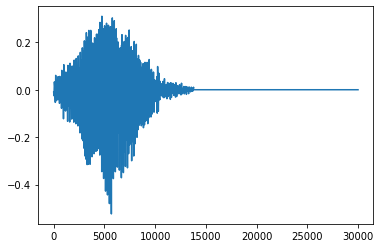

In [7]:
plt.plot(train[2])

In [8]:
print(train_labels.label.unique())

[5 1 0 9 4 6 7 3 8]


In [9]:
print(sample_submission.label.unique())

[ 1  6  3  7  4  8  9  5  2  0 10]


In [10]:
print(np.shape(test)[1])

30000


In [11]:
verbose, epochs, batch_size = 0, 10, 32

In [12]:
n_timesteps, n_features, n_outputs = train.shape[0], train.shape[1], train_labels.shape[0]

In [13]:
n_timesteps

942

In [14]:
train.shape[0],train.shape[1]

(942, 30000)

In [15]:
train1=np.reshape(train,(train.shape[0],500,60))
train1.shape

(942, 500, 60)

In [16]:
test1=np.reshape(test,(test.shape[0],500,60))
test1.shape

(558, 500, 60)

In [17]:
train_labels.shape

(942, 2)

In [18]:
train.shape[1]

30000

In [30]:
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional, ELU
from keras.models import Sequential
from keras.utils import Sequence
from keras.layers import LSTM

NO

In [31]:

# Neural network model
input_shape=(500,60)
#optimizer = adam(0.005, beta_1=0.1, beta_2=0.001, amsgrad=True)
n_classes = 80

model = models.Sequential()
model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=input_shape))
model.add(Dense(500))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(ELU())
model.add(Dropout(0.2)) 
model.add(Dense(10, activation='softmax'))



In [34]:
model = models.Sequential()
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(500,60)))
model.add(Bidirectional(LSTM(60)))
model.add(Dense(10))
model.add(Activation('softmax'))


In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 500, 20)           5680      
_________________________________________________________________
bidirectional_4 (Bidirection (None, 120)               38880     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1210      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 45,770
Trainable params: 45,770
Non-trainable params: 0
_________________________________________________________________


no

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train1, y_train, epochs=500)

Epoch 1/500


ValueError: ignored

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(train1, y_train, epochs=500)

Epoch 1/500
30/30 [==============================] - 2s 66ms/step - loss: 2.2273 - accuracy: 0.1412
Epoch 2/500
30/30 [==============================] - 2s 63ms/step - loss: 2.0981 - accuracy: 0.1953
Epoch 3/500
30/30 [==============================] - 2s 62ms/step - loss: 2.0304 - accuracy: 0.2229
Epoch 4/500
30/30 [==============================] - 2s 67ms/step - loss: 1.9448 - accuracy: 0.2696
Epoch 5/500
30/30 [==============================] - 2s 65ms/step - loss: 1.8827 - accuracy: 0.2834
Epoch 6/500
30/30 [==============================] - 2s 66ms/step - loss: 1.8460 - accuracy: 0.3068
Epoch 7/500
30/30 [==============================] - 2s 64ms/step - loss: 1.7586 - accuracy: 0.3588
Epoch 8/500
30/30 [==============================] - 2s 65ms/step - loss: 1.6991 - accuracy: 0.3758
Epoch 9/500
30/30 [==============================] - 2s 65ms/step - loss: 1.6006 - accuracy: 0.4076
Epoch 10/500
30/30 [==============================] - 2s 66ms/step - loss: 1.5806 - accuracy: 0.4161

In [37]:
pred = model.predict(test1)

In [38]:
np.argmax(pred[1])

9

In [39]:
predLabel = np.empty([len(test),2],dtype=int)
for i in range(len(pred)):
  predLabel[i][0] = np.int(i)
  predLabel[i][1] = np.int(np.argmax(pred[i]))


In [40]:
df = pd.DataFrame(predLabel, columns= ['id', 'label'])

df.to_csv (r'haiqzhu5.csv', index = False, header=True)

In [ ]:
sample_submission

,id,label
0,0,1
1,1,6
2,2,3
3,3,7
4,4,4
...,...,...
553,553,6
554,554,0
555,555,2
556,556,9


In [ ]:
df

,id,label
0,0,5
1,1,9
2,2,4
3,3,1
4,4,4
...,...,...
553,553,1
554,554,5
555,555,5
556,556,7
